### Importing Various Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report
pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset File

In [3]:
bc=pd.read_csv(r"C:\Users\shree\Downloads\Yogesh+Ashish\BankCrediTCard.csv")
bc

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,388948.0,183815.0,208365.0,99004.0,31237.0,15880.0,9600.0,20000.0,5005.0,3047.0,5000.0,1000.0,0
29996,29997,250000.0,1,3,2,43,0,0,0,0,0,0,3683.0,1838.0,3502.0,9979.0,5180.0,0.0,1937.0,3526.0,9999.0,139.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3355.0,2758.0,20979.0,20582.0,18357.0,0.0,0.0,22000.0,4300.0,3000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,0,0,-3645.0,78378.0,76304.0,52774.0,11855.0,48844.0,96900.0,3409.0,1179.0,1935.0,53965.0,1804.0,1


In [4]:
bc.shape

(30000, 25)

### Checking for the Null Values

In [5]:
bc.isna().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [6]:
bc.Default_Payment.value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

### Dropping the Customer_ID as it doesn't play any role in EDA and Model Building

In [7]:
bcc=bc.drop(['Customer ID'],axis=1)

In [8]:
bcc.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [9]:
bcc.shape

(30000, 24)

In [10]:
bcc.Gender.value_counts()


2    18112
1    11888
Name: Gender, dtype: int64

In [11]:
bcc.Academic_Qualification.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

### Mapping the Academic Qualification status of 4, 5, 6 to 4 as they are less in comparison with other categories

In [12]:
bcc["Academic_Qualification"]=bcc["Academic_Qualification"].map({1:1,2:2,3:3,4:4,5:5,6:5})

In [13]:
bcc.Marital.value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

### Mapping the Marital Status of 3, 0 to 0 as they are less in comparison with other categories 

In [14]:
bcc["Marital"]=bcc["Marital"].map({1:1,2:2,3:3,0:3})

In [15]:
bcc.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


### Checking for Singularity in each column

In [16]:
bcc.nunique().sort_values(ascending=True).reset_index(name= "Column unique count")

,index,Column unique count
0,Default_Payment,2
1,Gender,2
2,Marital,3
3,Academic_Qualification,5
4,Repayment_Status_May,6
5,Repayment_Status_June,6
6,Repayment_Status_Jan,7
7,Repayment_Status_Feb,7
8,Repayment_Status_March,7
9,Repayment_Status_April,7


### Decoding columns into categories

In [17]:
bcc.replace({"Gender" : {1:"Male", 2:"Female"},
             "Academic_Qualification" : {1:"Undergraduate", 2:"Graduate", 3:"Postgraduate",4:"Professional",5:"Others"},
             "Marital" : {1:"Married", 2:"Single", 3:"Do Not Prefer to say"},
             "Default_Payment" : {0:"No", 1: "Yes"}}, inplace = True)

In [18]:
bcc.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,Female,Graduate,Married,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,Yes
1,220000.0,Female,Graduate,Single,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,Yes
2,90000.0,Female,Graduate,Single,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,No
3,50000.0,Female,Graduate,Married,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,No
4,50000.0,Male,Graduate,Married,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,No


### Check for distribution of target variable (Default Payment) 

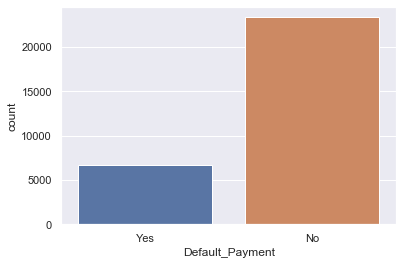

In [19]:
sns.set(style="darkgrid")
sns.countplot(bcc['Default_Payment'])

### How Default Payment is related with Gender

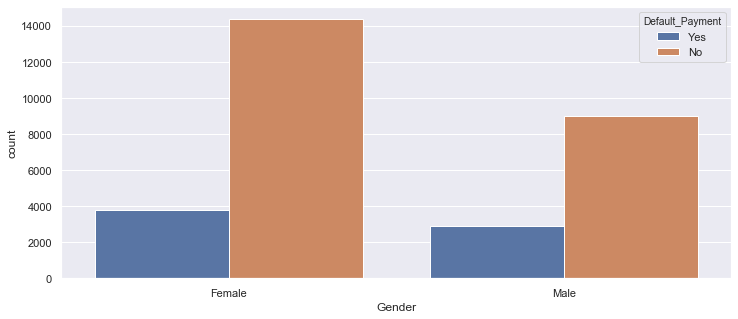

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
sns.countplot(x="Gender", hue="Default_Payment", data=bcc)

### How Default Payment is related with Academic Qualification

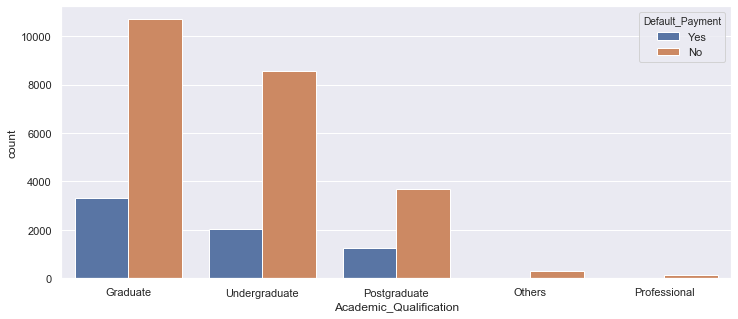

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
sns.countplot(x="Academic_Qualification", hue="Default_Payment", data=bcc, order = bcc["Academic_Qualification"].value_counts().index)

### How Default Payment is related with Marital Status

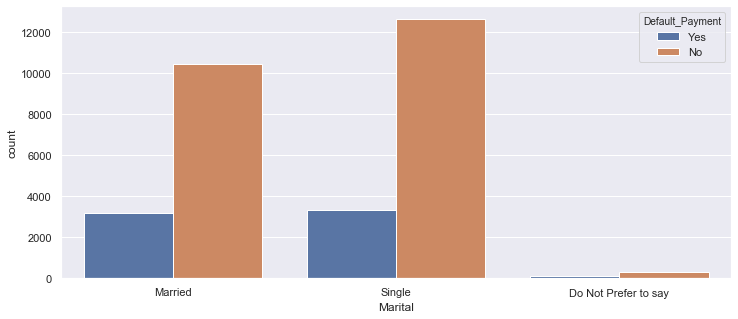

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
sns.countplot(x="Marital", hue="Default_Payment", data=bcc)

### How Default Payment is related with Age

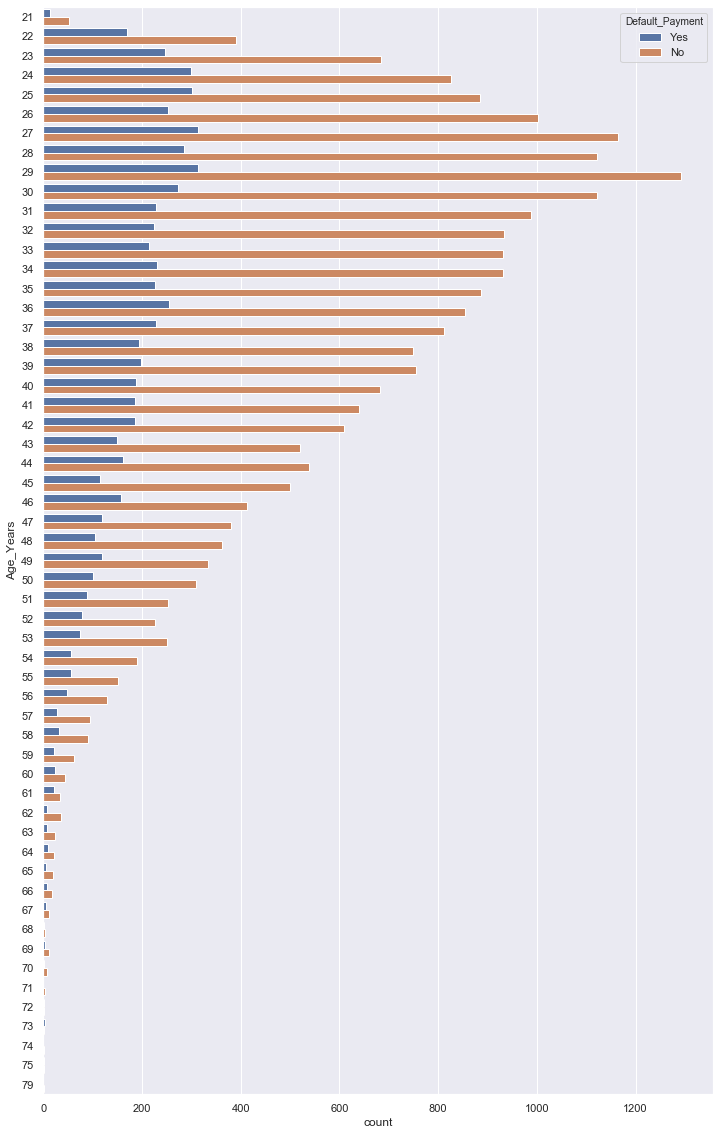

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,20))
sns.countplot(y="Age_Years", hue="Default_Payment", data=bcc)

In [24]:
bcc.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,Female,Graduate,Married,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,Yes
1,220000.0,Female,Graduate,Single,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,Yes
2,90000.0,Female,Graduate,Single,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,No
3,50000.0,Female,Graduate,Married,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,No
4,50000.0,Male,Graduate,Married,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,No


###  Encoding the Academic_Qualification variable

In [25]:
bcc.Academic_Qualification.replace({"Undergraduate":1, "Graduate":2, "Postgraduate":3, "Professional":4, "Others":5}, inplace = True)
bcc.Default_Payment.replace({"Yes":1 ,"No":0 }, inplace = True)
bcc.Gender.replace({"Male":1, "Female":2}, inplace = True)
bcc.Marital.replace({"Married":1, "Single":2, "Do Not Prefer to say":3}, inplace = True)

In [26]:
bcc_x=bcc.loc[:,bcc.columns!='Default_Payment']
bcc_y=bcc.loc[:,bcc.columns=='Default_Payment']

In [27]:
from sklearn.model_selection import train_test_split
bcc_x_train,bcc_x_test,bcc_y_train,bcc_y_test=train_test_split(bcc_x,bcc_y,test_size=.2,random_state=555)

In [28]:
bcc['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

# Smote

In [29]:
import math
import tensorflow as tf
import keras as k
import imblearn
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [30]:
smt=SMOTE()
bcc_x_train,bcc_y_train=smt.fit_sample(bcc_x_train,bcc_y_train)

In [31]:
bcc_y_train['Default_Payment'].value_counts()

1    18708
0    18708
Name: Default_Payment, dtype: int64

# Logistic Regression

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(bcc_x_train,bcc_y_train)
pred_log=logmodel.predict(bcc_x_test)
tab1=confusion_matrix(pred_log,bcc_y_test)
tab1

array([[2970,  591],
       [1686,  753]], dtype=int64)

In [33]:
acc1=tab1.diagonal().sum()* 100 / tab1.sum()
acc1

62.05

In [34]:
print(classification_report(bcc_y_test, pred_log, labels=[1]))

              precision    recall  f1-score   support

           1       0.31      0.56      0.40      1344

   micro avg       0.31      0.56      0.40      1344
   macro avg       0.31      0.56      0.40      1344
weighted avg       0.31      0.56      0.40      1344



In [35]:
sklearn.metrics.roc_auc_score(bcc_y_test, pred_log)

0.5990772275405007

In [36]:
from sklearn.model_selection import cross_val_score
acc_log=cross_val_score(logmodel,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_log.mean()

0.7787999999999999

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(bcc_x_train,bcc_y_train)
pred_dt=dtree.predict(bcc_x_test)
tab2=confusion_matrix(pred_dt,bcc_y_test)
tab2

array([[3532,  740],
       [1124,  604]], dtype=int64)

In [38]:
acc2=tab2.diagonal().sum()  *100/tab2.sum()
acc2

68.93333333333334

In [39]:
print(classification_report(bcc_y_test, pred_dt, labels=[1]))

              precision    recall  f1-score   support

           1       0.35      0.45      0.39      1344

   micro avg       0.35      0.45      0.39      1344
   macro avg       0.35      0.45      0.39      1344
weighted avg       0.35      0.45      0.39      1344



In [40]:
sklearn.metrics.roc_auc_score(bcc_y_test, pred_dt)

0.603997913598429

In [41]:
acc_dt=cross_val_score(dtree,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_dt.mean()

0.7256

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(bcc_x_train,bcc_y_train)
pred_rfc=rfc.predict(bcc_x_test)
tab3=confusion_matrix(pred_rfc,bcc_y_test)
tab3

array([[4095,  698],
       [ 561,  646]], dtype=int64)

In [43]:
acc3=tab3.diagonal().sum()  *100/tab3.sum()
acc3

79.01666666666667

In [44]:
print(classification_report(bcc_y_test, pred_rfc, labels=[1]))

              precision    recall  f1-score   support

           1       0.54      0.48      0.51      1344

   micro avg       0.54      0.48      0.51      1344
   macro avg       0.54      0.48      0.51      1344
weighted avg       0.54      0.48      0.51      1344



In [45]:
sklearn.metrics.roc_auc_score(bcc_y_test, pred_rfc)

0.6800825355915562

In [46]:
acc_rfc=cross_val_score(rfc,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_rfc.mean()

0.8150333333333334

# Support Vector Machine

In [47]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(bcc_x_train,bcc_y_train)
pred_bcc=svc_model.predict(bcc_x_test)
tab4=confusion_matrix(pred_bcc,bcc_y_test)
tab4

array([[2271,  361],
       [2385,  983]], dtype=int64)

In [48]:
acc4=tab4.diagonal().sum()* 100 / tab4.sum()
acc4

54.233333333333334

In [49]:
print(classification_report(bcc_y_test, pred_bcc, labels=[1]))

              precision    recall  f1-score   support

           1       0.29      0.73      0.42      1344

   micro avg       0.29      0.73      0.42      1344
   macro avg       0.29      0.73      0.42      1344
weighted avg       0.29      0.73      0.42      1344



In [50]:
sklearn.metrics.roc_auc_score(bcc_y_test, pred_bcc)

0.6095782707412862

In [51]:
acc_svm=cross_val_score(svc_model,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_svm.mean()

0.7788000000000002

# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(bcc_x_train,bcc_y_train)
pred_knn=knn.predict(bcc_x_test)
tab5=confusion_matrix(pred_knn,bcc_y_test)
tab5

array([[2843,  630],
       [1813,  714]], dtype=int64)

In [53]:
acc5=tab5.diagonal().sum()* 100 / tab5.sum()
acc5

59.28333333333333

In [54]:
aa = list() 
for i in range(1,50): 
    knn  =  KNeighborsClassifier(n_neighbors=i) 
    knn.fit(bcc_x_train , bcc_y_train) 
    pred_knn =  knn.predict(bcc_x_test) 
    tab =confusion_matrix(pred_knn , bcc_y_test) 
    acc = sum(tab.diagonal()) / tab.sum() 
    aa.append(acc)

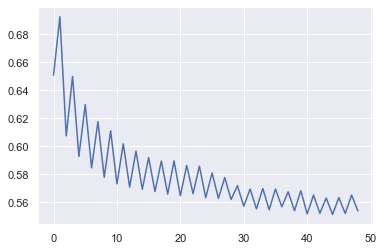

In [55]:
aa
plt.plot(aa)

### Now Selecting the K value as 30

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(bcc_x_train,bcc_y_train)
pred_knn=knn.predict(bcc_x_test)
tab5=confusion_matrix(pred_knn,bcc_y_test)
tab5

array([[2532,  445],
       [2124,  899]], dtype=int64)

In [57]:
acc5=tab5.diagonal().sum()* 100 / tab5.sum()
acc5

57.18333333333333

In [58]:
print(classification_report(bcc_y_test, pred_knn, labels=[1]))

              precision    recall  f1-score   support

           1       0.30      0.67      0.41      1344

   micro avg       0.30      0.67      0.41      1344
   macro avg       0.30      0.67      0.41      1344
weighted avg       0.30      0.67      0.41      1344



In [59]:
sklearn.metrics.roc_auc_score(bcc_y_test, pred_knn)

0.6063566212567502

In [60]:
acc_knn=cross_val_score(knn,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_knn.mean()

0.7788

# Adaboost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(  DecisionTreeClassifier(),n_estimators=15)
abc.fit(bcc_x_train,bcc_y_train)
pred_abc=abc.predict(bcc_x_test)
tab6=confusion_matrix(pred_abc,bcc_y_test)
tab6

array([[3946,  741],
       [ 710,  603]], dtype=int64)

In [62]:
acc6=tab6.diagonal().sum()* 100 / tab6.sum()
acc6

75.81666666666666

In [63]:
print(classification_report(bcc_y_test, pred_abc, labels=[1]))

              precision    recall  f1-score   support

           1       0.46      0.45      0.45      1344

   micro avg       0.46      0.45      0.45      1344
   macro avg       0.46      0.45      0.45      1344
weighted avg       0.46      0.45      0.45      1344



In [64]:
sklearn.metrics.roc_auc_score(bcc_y_test, pred_abc)

0.6480846526755033

In [65]:
acc_ada=cross_val_score(abc,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_ada.mean()

0.7800666666666667

# Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(bcc_x_train, bcc_y_train)
pred_clf=clf.predict(bcc_x_test)
tab7=confusion_matrix(pred_clf,bcc_y_test)
tab7

array([[3854,  602],
       [ 802,  742]], dtype=int64)

In [67]:
acc7=tab7.diagonal().sum()* 100 / tab7.sum()
acc7

76.6

In [68]:
print(classification_report(bcc_y_test, pred_clf, labels=[1]))

              precision    recall  f1-score   support

           1       0.48      0.55      0.51      1344

   micro avg       0.48      0.55      0.51      1344
   macro avg       0.48      0.55      0.51      1344
weighted avg       0.48      0.55      0.51      1344



In [69]:
sklearn.metrics.roc_auc_score(bcc_y_test, pred_clf)

0.6899162371134021

In [70]:
acc_gbc=cross_val_score(clf,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_gbc.mean()

0.8202333333333331

# XG-Boost Classifier

In [71]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(bcc_x_train,bcc_y_train)
predict_model = model.predict(bcc_x_test)
tab8=confusion_matrix(predict_model,bcc_y_test)
tab8

array([[4104,  733],
       [ 552,  611]], dtype=int64)

In [72]:
acc8=tab8.diagonal().sum()* 100 / tab8.sum()
acc8

78.58333333333333

In [73]:
print(classification_report(bcc_y_test, predict_model, labels=[1]))

              precision    recall  f1-score   support

           1       0.53      0.45      0.49      1344

   micro avg       0.53      0.45      0.49      1344
   macro avg       0.53      0.45      0.49      1344
weighted avg       0.53      0.45      0.49      1344



In [74]:
sklearn.metrics.roc_auc_score(bcc_y_test, predict_model)

0.6680281971035837

In [75]:
acc_xgb=cross_val_score(model,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_xgb.mean()

0.8140000000000001

# Feature Selection 1

### Checking for Correlation among Independent Variables

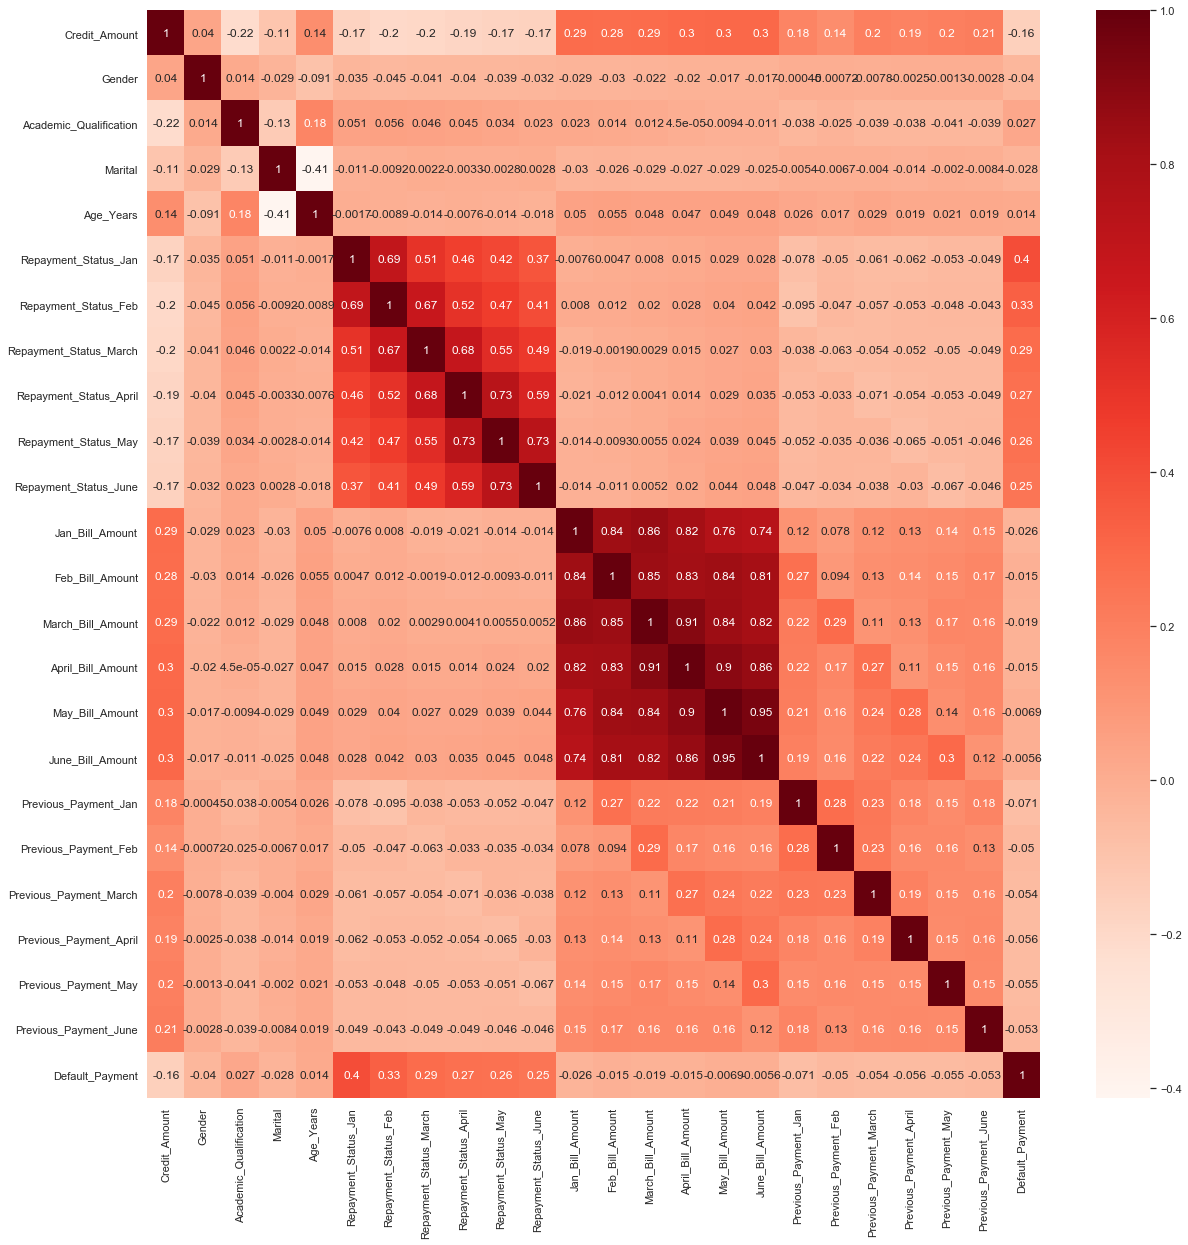

In [76]:
plt.figure(figsize=(20,20))
cor = bcc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Removing the features having correlation above 80 %

In [77]:
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['Feb_Bill_Amount',
 'March_Bill_Amount',
 'April_Bill_Amount',
 'May_Bill_Amount',
 'June_Bill_Amount']

In [78]:
bcc1= bcc.drop(columns=['Feb_Bill_Amount','March_Bill_Amount','April_Bill_Amount','May_Bill_Amount','June_Bill_Amount'])

In [79]:
bcc1.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,39339.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8637.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [80]:
bcc1.shape

(30000, 19)

### Splitting the dataset into train and test

In [81]:
bcc1_x=bcc.loc[:,bcc.columns!='Default_Payment']
bcc1_y=bcc.loc[:,bcc.columns=='Default_Payment']

In [82]:
from sklearn.model_selection import train_test_split
bcc1_x_train,bcc1_x_test,bcc1_y_train,bcc1_y_test=train_test_split(bcc1_x,bcc1_y,test_size=.2,random_state=888)

In [83]:
bcc1['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

### Smote

In [84]:
smt=SMOTE()
bcc1_x_train,bcc1_y_train=smt.fit_sample(bcc1_x_train,bcc1_y_train)

In [85]:
bcc1_y_train['Default_Payment'].value_counts()

1    18701
0    18701
Name: Default_Payment, dtype: int64

### Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score

## Logistic Regression

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(bcc1_x_train,bcc1_y_train)
pred_logi=logmodel.predict(bcc1_x_test)
tab11=confusion_matrix(pred_logi,bcc1_y_test)
tab11

array([[3594,  883],
       [1069,  454]], dtype=int64)

In [88]:
acc11=tab11.diagonal().sum()* 100 / tab11.sum()
acc11

67.46666666666667

In [89]:
acc_log=cross_val_score(logmodel,bcc1_x,bcc1_y,cv=5,scoring='accuracy')
acc_log.mean()

0.7787999999999999

## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(bcc1_x_train,bcc1_y_train)
pred_dtree=dtree.predict(bcc1_x_test)
tab12=confusion_matrix(pred_dtree,bcc1_y_test)
tab12

array([[3479,  700],
       [1184,  637]], dtype=int64)

In [91]:
acc12=tab12.diagonal().sum()* 100 / tab12.sum()
acc12

68.6

In [92]:
acc_dt=cross_val_score(dtree,bcc1_x,bcc1_y,cv=5,scoring='accuracy')
acc_dt.mean()

0.7248

## Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(bcc1_x_train,bcc1_y_train)
pred_rfc1=rfc.predict(bcc1_x_test)
tab13=confusion_matrix(pred_rfc1,bcc1_y_test)
tab13

array([[4086,  709],
       [ 577,  628]], dtype=int64)

In [94]:
acc13=tab13.diagonal().sum()* 100 / tab13.sum()
acc13

78.56666666666666

In [95]:
acc_rfc1=cross_val_score(rfc,bcc1_x,bcc1_y,cv=5,scoring='accuracy')
acc_rfc1.mean()

0.8136333333333333

## Support Vector Machine

In [96]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(bcc1_x_train,bcc1_y_train)
pred_svc1=svc_model.predict(bcc1_x_test)
tab14=confusion_matrix(pred_svc1,bcc1_y_test)
tab14

array([[2095,  312],
       [2568, 1025]], dtype=int64)

In [97]:
acc14=tab14.diagonal().sum()* 100 / tab14.sum()
acc14

52.0

In [98]:
acc_svc1=cross_val_score(svc_model,bcc1_x,bcc1_y,cv=5,scoring='accuracy')
acc_svc1.mean()

0.7788000000000002

## K Nearest Neighbour

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(bcc1_x_train,bcc1_y_train)
pred_knn1=knn.predict(bcc1_x_test)
tab15=confusion_matrix(pred_knn1,bcc1_y_test)
tab15

array([[2936,  656],
       [1727,  681]], dtype=int64)

In [100]:
acc15=tab15.diagonal().sum()* 100 / tab15.sum()
acc15

60.28333333333333

In [101]:
acc_knn1=cross_val_score(knn,bcc1_x,bcc1_y,cv=5,scoring='accuracy')
acc_knn1.mean()

0.7541333333333333

In [102]:
aa1 = list() 
for i in range(1,50): 
    knn  =  KNeighborsClassifier(n_neighbors=i) 
    knn.fit(bcc1_x_train , bcc1_y_train) 
    pred_knn1 =  knn.predict(bcc1_x_test) 
    tab =confusion_matrix(pred_knn1 , bcc1_y_test) 
    acc1 = sum(tab.diagonal()) / tab.sum() 
    aa1.append(acc1)

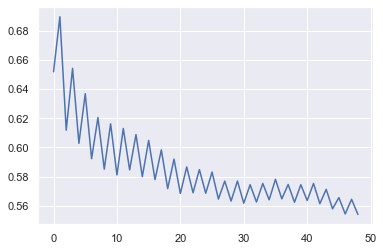

In [103]:
aa1
plt.plot(aa1)

#### The value of K is unstable , hence we dont take any value from above plot.

## ADA Boost

In [104]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(  DecisionTreeClassifier(),n_estimators=15)
abc.fit(bcc1_x_train,bcc1_y_train)
pred_abc1=abc.predict(bcc1_x_test)
tab16=confusion_matrix(pred_abc1,bcc1_y_test)
tab16

array([[3912,  710],
       [ 751,  627]], dtype=int64)

In [105]:
acc16=tab16.diagonal().sum()* 100 / tab16.sum()
acc16

75.65

In [106]:
acc_ada1=cross_val_score(abc,bcc1_x,bcc1_y,cv=5,scoring='accuracy')
acc_ada1.mean()

0.7552999999999999

## Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(bcc1_x_train, bcc1_y_train)
pred_clf1=clf.predict(bcc1_x_test)
tab17=confusion_matrix(pred_clf1,bcc1_y_test)
tab17

array([[3860,  601],
       [ 803,  736]], dtype=int64)

In [108]:
acc17=tab17.diagonal().sum()* 100 / tab17.sum()
acc17

76.6

In [109]:
acc_gb1=cross_val_score(clf,bcc1_x,bcc1_y,cv=5,scoring='accuracy')
acc_gb1.mean()

0.8202333333333331

## XG Boost

In [110]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(bcc1_x_train,bcc1_y_train)
predict_model1 = model.predict(bcc1_x_test)
tab18=confusion_matrix(predict_model1,bcc1_y_test)
tab18

array([[4097,  748],
       [ 566,  589]], dtype=int64)

In [111]:
acc18=tab18.diagonal().sum()* 100 / tab18.sum()
acc18

78.1

In [112]:
acc_xg1=cross_val_score(model,bcc1_x,bcc1_y,cv=5,scoring='accuracy')
acc_xg1.mean()

0.8140000000000001

# Feature Selection 

## RFE

In [113]:
bcc_x.shape

(30000, 23)

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rf=RandomForestClassifier()
rfe_rfc=RFE(rf,17)
rfe_rfc.fit(bcc_x,bcc_y)
rfe_rfc.support_    #below isthe output 

array([ True, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [115]:
feature_importance=pd.DataFrame({'Features':list(bcc_x),'Importance':list(rfe_rfc.support_)})
feature_importance

,Features,Importance
0,Credit_Amount,True
1,Gender,False
2,Academic_Qualification,False
3,Marital,False
4,Age_Years,True
5,Repayment_Status_Jan,True
6,Repayment_Status_Feb,True
7,Repayment_Status_March,False
8,Repayment_Status_April,True
9,Repayment_Status_May,False


## Feature Importance by Decision Tree

In [116]:
dtree_fi = DecisionTreeClassifier()
dtree_fi.fit(bcc_x,bcc_y)
dfi = pd.DataFrame({"Feauture": bcc_x.columns, "Importance": dtree_fi.feature_importances_})
dfi

,Feauture,Importance
0,Credit_Amount,0.050624
1,Gender,0.012662
2,Academic_Qualification,0.022058
3,Marital,0.014108
4,Age_Years,0.072637
5,Repayment_Status_Jan,0.158011
6,Repayment_Status_Feb,0.031764
7,Repayment_Status_March,0.005537
8,Repayment_Status_April,0.004164
9,Repayment_Status_May,0.007557


## Feature Importance by Random Forest

In [117]:
rfc_fi = RandomForestClassifier()
rfc_fi.fit(bcc_x,bcc_y)
firf = pd.DataFrame({"Feauture": bcc_x.columns, "Importance": rfc_fi.feature_importances_})
firf

,Feauture,Importance
0,Credit_Amount,0.055229
1,Gender,0.012034
2,Academic_Qualification,0.021442
3,Marital,0.013929
4,Age_Years,0.069174
5,Repayment_Status_Jan,0.087861
6,Repayment_Status_Feb,0.044739
7,Repayment_Status_March,0.023181
8,Repayment_Status_April,0.018722
9,Repayment_Status_May,0.016150


## Boruta

In [118]:
from boruta import BorutaPy
rf=RandomForestClassifier()
bcc_x=np.array(bcc_x)
boruta_feature_selector=BorutaPy(rf,random_state=111,max_iter=25,perc=100)
boruta_feature_selector.fit(bcc_x,bcc_y)
boruta_feature_selector.support_

array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [119]:
bc.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [120]:
bcc_x=bc.iloc[:,1:24]
fibo = pd.DataFrame({"Feauture": list(bcc_x.columns), "Importance":list(boruta_feature_selector.support_)})
fibo

,Feauture,Importance
0,Credit_Amount,False
1,Gender,False
2,Academic_Qualification,False
3,Marital,False
4,Age_Years,False
5,Repayment_Status_Jan,True
6,Repayment_Status_Feb,True
7,Repayment_Status_March,False
8,Repayment_Status_April,False
9,Repayment_Status_May,False


In [121]:
Final_feature_selection = pd.DataFrame({"Feauture": bcc_x.columns, "RFE": rfe_rfc.support_,
                                  "Importance(Decision Tree)": dtree_fi.feature_importances_, "Importance (RandomForest)": rfc_fi.feature_importances_,
                                 "Boruta-Support": boruta_feature_selector.support_ })
Final_feature_selection=Final_feature_selection.sort_values(by=['Importance(Decision Tree)'], ascending=False)
Final_feature_selection

,Feauture,RFE,Importance(Decision Tree),Importance (RandomForest),Boruta-Support
5,Repayment_Status_Jan,True,0.158011,0.087861,True
4,Age_Years,True,0.072637,0.069174,False
11,Jan_Bill_Amount,True,0.068711,0.064927,False
19,Previous_Payment_March,True,0.057899,0.046914,False
15,May_Bill_Amount,True,0.053911,0.052848,False
12,Feb_Bill_Amount,True,0.053361,0.058349,False
0,Credit_Amount,True,0.050624,0.055229,False
16,June_Bill_Amount,True,0.050589,0.053265,False
18,Previous_Payment_Feb,True,0.049963,0.048440,False
21,Previous_Payment_May,True,0.049863,0.045264,False


# Gradient Boosting is working the best among all with following evaluation parameters


### Accuracy: 82.05 %

### Recall / Sensitivity: 55 %   (ability to predict correctly all positives means Predicting Default Payment for next Month YES )

### Specificity : 82.77 % (ability to predict correctly all negative means Predicting Default Payment for next Month NO)

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=100)
clf.fit(bcc_x_train, bcc_y_train)
pred_gb=clf.predict(bcc_x_test)
tab_final=confusion_matrix(pred_gb,bcc_y_test)
tab_final

array([[3854,  602],
       [ 802,  742]], dtype=int64)

In [196]:
acc_final=tab_final.diagonal().sum()* 100 / tab_final.sum()
acc_final

76.6

In [197]:
print(classification_report(bcc_y_test, pred_gb, labels=[1]))

              precision    recall  f1-score   support

           1       0.48      0.55      0.51      1344

   micro avg       0.48      0.55      0.51      1344
   macro avg       0.48      0.55      0.51      1344
weighted avg       0.48      0.55      0.51      1344



In [198]:
auroc=sklearn.metrics.roc_auc_score(bcc_y_test, pred_gb)
auroc

0.6899162371134021

In [199]:
acc_svm=cross_val_score(clf,bcc_x,bcc_y,cv=5,scoring='accuracy')
acc_svm.mean()

0.8205

In [200]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [201]:
pred_value_prob = clf.predict_proba(bcc_x_test)

In [202]:
pred_value_prob = pd.DataFrame(pred_value_prob)

In [203]:
pred_value_prob = pred_value_prob.iloc[ : , -1]

In [204]:
fpr, tpr, threshold = roc_curve(bcc_y_test, pred_value_prob)

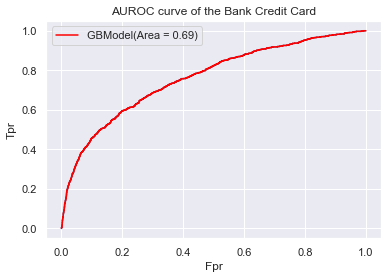

In [205]:
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, color = "red", label = "GBModel(Area = %0.2f)" % auroc)
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("AUROC curve of the Bank Credit Card")
plt.legend(loc = "upper left")

In [206]:
# give preferance to f1 score instead on AUROC, because AUROC could be wrong due to TPR
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [207]:
pred_value1 = clf.predict(bcc_x_test)
pred_value1_prob = clf.predict_proba(bcc_x_test)

In [208]:
pred_value1_prob = pd.DataFrame(pred_value1_prob)

In [209]:
precision, recall, thresholds = precision_recall_curve(bcc_y_test, pred_value1_prob.iloc[ : , 1])

In [210]:
f1 = f1_score(bcc_y_test, pred_value1)
f1

0.5138504155124654

Text(0.5, 1.0, 'Precision-Recall')

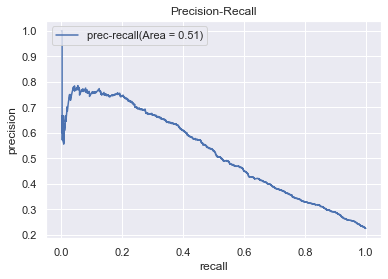

In [211]:
plt.plot(recall, precision, label = 'prec-recall(Area = %.2f)' %f1)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(loc = "upper left")
plt.title("Precision-Recall")